# PREPARATION

## import librairies

In [32]:
import tensorflow as tf
import keras as ks
# general
import os
import sys
import io

import argparse
from datetime import datetime
import h5py
import importlib

# Indispensables
import pandas as pd
import numpy as np
import geopandas as gpd
import math

# VISU
from IPython.display import Image, IFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm


import colorsys
print('TensorFlow: %s' % tf.__version__)
print('Kerasw: %s' % ks.__version__)
print('Panda version: %s' % pd.__version__)
print('Numpy version: %s' % np.__version__)
print('Geo Panda version: %s' % gpd.__version__)


TensorFlow: 2.0.0
Kerasw: 2.3.1
Panda version: 0.25.1
Numpy version: 1.17.2
Geo Panda version: 0.7.0


In [33]:
import platform

print(os.name)
print(platform.system())
print(platform.release())


posix
Darwin
18.7.0


## Déclaration des directories et variables

In [34]:
BASE_DIR = os.getcwd()

separe = "/"
# Laptop
if platform.system() == 'Darwin' and platform.release() == '18.7.0':
    DATA_DIR  = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/"
    DATA_DIR2 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA2/"
# sur IMAC
else:   #if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    DATA_DIR  = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/"
    DATA_DIR2 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/"
## Eurométropole
if platform.system() == 'Windows':
    DATA_DIR  = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA1\\"
    DATA_DIR2 = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA2\\"
    separe = "\\"

DALLE_NUM = DATA_DIR + "DallesNumPoints5m" + separe
DALLE_ECA = DATA_DIR + "DallesEcartZ5m" + separe
DALLE_POS = DATA_DIR + "DallesPosition5m" + separe
print("Working directory:",BASE_DIR)
print("Data ROOT directory:",DATA_DIR)

sys.path.append(DATA_DIR)
sys.path.append(os.path.join(DATA_DIR,'DallesNumPoints5m\\'))
sys.path

Working directory: /Users/pierreleisy/C-PYTHON/training-Python/NOTEBOOK
Data ROOT directory: /Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/


['/Users/pierreleisy/C-PYTHON/training-Python/NOTEBOOK',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python37.zip',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/lib-dynload',
 '',
 '/Users/pierreleisy/.local/lib/python3.7/site-packages',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/site-packages',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/site-packages/IPython/extensions',
 '/Users/pierreleisy/.ipython',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m\\',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m\\',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m\\',
 '/Users/pierrelei

## création des listes d'images

In [35]:
from os import listdir
#from os.path import isfile, join
#from os import walk
import glob

#liste1 = [f for f in listdir(DALLE_NUM) if isfile(join(DALLE_NUM, f))]
liste_1 = [f for f in glob.glob(DALLE_NUM + separe + "*.tif", recursive=True)]#   #only first N for test
liste_2 = [f for f in glob.glob(DALLE_ECA + separe + "*.tif", recursive=True)]#[:2]  
liste_3 = [f for f in glob.glob(DALLE_POS + separe + "*.tif", recursive=True)]#[:2]   
print(len(listdir(DALLE_NUM)), len(liste_1), len(liste_2), len(liste_3))

liste_NUM = os.listdir(DALLE_NUM)
liste_ECA = os.listdir(DALLE_ECA)
liste_POS = os.listdir(DALLE_POS)
print(len(liste_NUM), len(liste_ECA), len(liste_POS))

58771 29384 29384 29384
58771 58773 58768


# DONNEES

## Lecture des images (tests)

In [37]:
from PIL import Image
import rasterio
import imageio

print(liste_1[:2])
fichier1 = liste_1[0]
print(fichier1)
im1 = imageio.imread(fichier1)
print(im1.shape)
df1 = pd.DataFrame(im1)
print(df1)

print(liste_2[:2])
fichier2 = liste_2[0]
print(fichier2)
im2 = imageio.imread(fichier2)
print(im2.shape)
df2 = pd.DataFrame(im2)
#print(df2)

print(liste_3[:2])
fichier3 = liste_3[0]
print(fichier3)
im3 = imageio.imread(fichier3)
print(im3.shape)
df3 = pd.DataFrame(im3)
#print(df3)
df3.describe()

['/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m/2043020_7272860_NumPoints5m.tif', '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m/2042520_7272025_NumPoints5m.tif']
/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m/2043020_7272860_NumPoints5m.tif
(10, 10)
     0    1    2    3    4    5    6    7    8    9
0  6.0  5.0  3.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1  3.0  1.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  1.0  7.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  2.0  2.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  1.0  4.0  2.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  1.0  1.0  2.0  2.0  1.0  1.0  0.0
6  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0
7  0.0  0.0  0.0  2.0  0.0  0.0  2.0  6.0  1.0  1.0
8  1.0  1.0  0.0  0.0  0.0  0.0  1.0  6.0  1.0  0.0
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  4.0  1.0
['/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesEcartZ5m/2043320_7272425_EcartZ5m.tif', '/

,0,1,2,3,4,5,6,7,8,9
count,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## creation fichier/dataframe lampes des lampadaires présents dans la dalle 1x1 km

In [40]:
fich_lamp = DATA_DIR+"LampadairePresence_0_1_5m.asc"
header = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=0, nrows=5, names=["noms","valeurs"])
n_row =  header['valeurs'][0]
n_col =  header['valeurs'][1]
xlow = header['valeurs'][2]
ylow = header['valeurs'][3]
cell_size = header['valeurs'][4]
#ylow = pd.read_csv(fich_lamp, sep=" ", skiprows=3, header=None, nrows=1)[1]
print("Bord inférieur gauche:", xlow, ylow, n_row, n_col, cell_size)

lampadaires = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=6)
#print(lampadaires.count())
#print(lampadaires[2].value_counts())
#print(lampadaires.columns)
print(lampadaires.sum().head(10))
#print(lampadaires.nunique())
print(lampadaires.nunique().agg(['mean','count','sum']))
# print(lampadaires.head(5))
# print(lampadaires.describe())

# TRANSPOSEE 
lampadaires = lampadaires.T
# inversion des colonnes (nombre pair de colonnes)
lampadaires = lampadaires[lampadaires.columns[::-1]]

lampes0 = pd.DataFrame(np.reshape(lampadaires.to_numpy(), n_row*n_col))

fich_lamp2 = DATA_DIR2 + "listepositif.xlsx"
lampes2 = pd.read_excel(fich_lamp2, header=0, skiprows=0)
lampes2

Bord inférieur gauche: 2042500 7272000 200 200 5
0    3.0
1    4.0
2    6.0
3    2.0
4    1.0
5    5.0
6    3.0
7    0.0
8    0.0
9    2.0
dtype: float64
mean       1.79
count    200.00
sum      358.00
dtype: float64


,_column,_row,_overlaps,posX,posY
0,0,80,1,2042502,7272402
1,0,92,1,2042502,7272462
2,0,102,1,2042502,7272512
3,0,106,1,2042502,7272532
4,0,169,1,2042502,7272847
...,...,...,...,...,...
350,196,184,1,2043482,7272922
351,197,84,1,2043487,7272422
352,197,163,1,2043487,7272817
353,197,170,1,2043487,7272852


In [41]:
lampes0.head()
print(lampes0.shape)

(40000, 1)


In [42]:
print(lampadaires.shape, lampes0.shape, lampes2.shape)
#print(lampadaires.describe())
lampadaires.sum().sum()

(200, 200) (40000, 1) (355, 5)


357.0

In [43]:
lampes0['NumI'] = lampes0.index
lampes0['NumY'] = lampes0['NumI'].mod(other=n_col)
lampes0['NumX'] = ((lampes0['NumI'] - n_row + 1) / n_row).apply(np.ceil)
# ou est   erreur avant ???
#lampes['NumX'] = lampes['NumI'].mod(other=n_col)
#lampes['NumY'] = lampes['Num'].apply(np.ceil)

#lampes = lampes.drop(['Num'], axis=1)
lampes0.rename(columns={0: 'present'}, inplace=True)
lampes0 = lampes0.astype({'present': 'int8'}, copy=False)
lampes0 = lampes0.astype({'NumY': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumI': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumX': 'int32'}, copy=False)
lampes0.dtypes

present     int8
NumI       int32
NumY       int32
NumX       int32
dtype: object

In [44]:
#lampes['X'] = xlow + np.round((lampes['Num0'] - n_row + 1)/n_row, 0) * cell_size
#lampes['X'] = xlow + lampes.index + (n_row - lampes.index) * n_col
#print(lampes.describe(include='all'))
lampes0['X'] = xlow + lampes0['NumX'] * cell_size
lampes0['Y'] = ylow + lampes0['NumY'] * cell_size
lampes0['nom_NUM'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_NumPoints5m.tif"
lampes0['nom_ECA'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) + "_EcartZ5m.tif"
lampes0['nom_POS'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_Position5m.tif"
lampes0.head()

,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
0,0,0,0,0,2042500,7272000,2042500_7272000_NumPoints5m.tif,2042500_7272000_EcartZ5m.tif,2042500_7272000_Position5m.tif
1,0,1,1,0,2042500,7272005,2042500_7272005_NumPoints5m.tif,2042500_7272005_EcartZ5m.tif,2042500_7272005_Position5m.tif
2,0,2,2,0,2042500,7272010,2042500_7272010_NumPoints5m.tif,2042500_7272010_EcartZ5m.tif,2042500_7272010_Position5m.tif
3,0,3,3,0,2042500,7272015,2042500_7272015_NumPoints5m.tif,2042500_7272015_EcartZ5m.tif,2042500_7272015_Position5m.tif
4,0,4,4,0,2042500,7272020,2042500_7272020_NumPoints5m.tif,2042500_7272020_EcartZ5m.tif,2042500_7272020_Position5m.tif


In [45]:
print(lampes0.shape)
lampes1 = lampes0[lampes0['present'] > 0]
print(lampes1.shape)

(40000, 9)
(357, 9)


In [46]:
lampes1.head(8)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
52,1,52,52,0,2042500,7272260,2042500_7272260_NumPoints5m.tif,2042500_7272260_EcartZ5m.tif,2042500_7272260_Position5m.tif
92,1,92,92,0,2042500,7272460,2042500_7272460_NumPoints5m.tif,2042500_7272460_EcartZ5m.tif,2042500_7272460_Position5m.tif
170,1,170,170,0,2042500,7272850,2042500_7272850_NumPoints5m.tif,2042500_7272850_EcartZ5m.tif,2042500_7272850_Position5m.tif
249,1,249,49,1,2042505,7272245,2042505_7272245_NumPoints5m.tif,2042505_7272245_EcartZ5m.tif,2042505_7272245_Position5m.tif
281,1,281,81,1,2042505,7272405,2042505_7272405_NumPoints5m.tif,2042505_7272405_EcartZ5m.tif,2042505_7272405_Position5m.tif
303,1,303,103,1,2042505,7272515,2042505_7272515_NumPoints5m.tif,2042505_7272515_EcartZ5m.tif,2042505_7272515_Position5m.tif
307,1,307,107,1,2042505,7272535,2042505_7272535_NumPoints5m.tif,2042505_7272535_EcartZ5m.tif,2042505_7272535_Position5m.tif
405,1,405,5,2,2042510,7272025,2042510_7272025_NumPoints5m.tif,2042510_7272025_EcartZ5m.tif,2042510_7272025_Position5m.tif


## Extraction de(s) image(s) dans un dataframe unique (à partir de imageio)

In [47]:
#test image 10x10 sur 10 lignes

print(os.getcwd())

list_lamp1 = lampes1['nom_NUM']
print(list_lamp1.shape)
i=0
for n,fich in enumerate(list_lamp1):
    fiche = DALLE_NUM+fich  
    if os.path.exists(fiche):
        i += 1
        #print(n, fiche)
        data = imageio.imread(fiche)
        indices = [j for j in range((i-1)*10, i*10)]
        df_int = pd.DataFrame(data, index=indices)
        if i == 1:
            print(data)
            df = df_int
        else:
            df = pd.concat([df, df_int])
    
print(n, i, df.shape, df.shape[0]/i)
df        

/Users/pierreleisy/C-PYTHON/training-Python/NOTEBOOK
(357,)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 3. 0. 0. 0. 0. 0. 0.]]
356 352 (3520, 10) 10.0


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3516,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3517,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
3518,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### création de la table de 200-300 colonnes

In [89]:
list_lamp1 = lampes1['nom_NUM']

NN = 1000
liste_1b = list(set(liste_1[:NN] + list(DALLE_NUM + list_lamp1)))
# liste_1b = list(set(list_lampe_fin[:NN] + list(DALLE_NUM + list_lamp1)))

print(list_lamp1.shape, len(liste_1), len(liste_1b))

for n,fich in enumerate(liste_1b):
    fiche = DALLE_NUM+fich  
    if os.path.exists(fiche):
        fichierNum1 = fiche
        #df_1 = pd.DataFrame(imageio.imread(fichierNum1))
    #print(n, fiche1)


(357,) 29384 1345


In [83]:
liste_1b

['/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m/2043220_7272365_NumPoints5m.tif',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m/2042590_7272940_NumPoints5m.tif',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m/2042620_7272105_NumPoints5m.tif',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m/2042960_7272620_NumPoints5m.tif',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m/2042515_7272010_NumPoints5m.tif',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m/2042745_7272355_NumPoints5m.tif',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m/2043430_7272810_NumPoints5m.tif',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m/2043200_7272840_NumPoints5m.tif',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m/2043020_7272165_NumPoints5m.tif',
 '/Users/pierreleisy/Data_Science/NOT

In [51]:
n_row2 =  10   #TODO mettre le produit des dimension de la matrice image
n_col2 =  10
N2 = n_row2*n_col2  # N=100    
print(os.getcwd())
list_lamp1 = lampes1['nom_NUM']
list_lamp2 = lampes1['nom_ECA']
print(list_lamp1.shape, list_lamp2.shape)
i=0
for n,fich1 in enumerate(list_lamp1):
    fiche1 = DALLE_NUM+fich1
    fich2 = fich1.replace("NumPoints5m", "EcartZ5m")
    fiche2 = DALLE_ECA+fich2
    #fich3 = fich1.replace("NumPoints5m", "Position5m")
    #fiche3 = DALLE_POS+fich3  
    if os.path.exists(fiche1) and os.path.exists(fiche2):    # Manque des fichiers sur les 40000
        i += 1
        data1 = np.reshape(imageio.imread(fiche1), N2) #.flatten()
        data1T = np.expand_dims(data1, axis=0)
        data2 = np.reshape(imageio.imread(fiche2), N2)
        data2T = np.expand_dims(data2, axis=0)
        #data3 = np.reshape(imageio.imread(fiche3), N2)
        #data3T = np.expand_dims(data3, axis=0)
        #print(i, data1T.shape, data2T.shape, data3T.shape)
        df_int1 = pd.DataFrame(data1T, index=[i])  #, index=indices)
        df_int2 = pd.DataFrame(data2T, index=[i])  
        #df_int3 = pd.DataFrame(data3T, index=[i])
        # MERGE 
        #df_inta = df_int1.merge(df_int2, left_index=True, right_index=True, suffixes=('_num', '_h'))
        #df_int = df_inta.merge(df_int3, left_index=True, right_index=True)
        df_int = df_int1.merge(df_int2, left_index=True, right_index=True, suffixes=('_num', '_h'))
        if i == 1:
            #print(dataT)
            df = df_int
        else:
            df = pd.concat([df, df_int])
    else:
        pass
        #print(fiche1, fich2)
if i > 0:
    print(n+1, i, n+1-i, df.shape, df.shape[0]/i)

for n in range(0,N2):
    df = df.astype({str(n)+'_num': 'int8'}, copy=False)
    df['label'] = 1  # ou 1
print(df.dtypes)
df

#  TODO rajouter une colonne de présence ( comparer avec SORTIE :  0 ou 1)
#####################################################
#  remplir une colonne de zéro
#  puis boucler sur les N=357 valeurs pour indiquer la présence d'un lampadaire
#####################################################
#  puis faire 100 sorties 0-1 pour  les 100 positions

/Users/pierreleisy/C-PYTHON/training-Python/NOTEBOOK
(357,) (357,)
357 352 5 (352, 200) 1.0
0_num       int8
1_num       int8
2_num       int8
3_num       int8
4_num       int8
          ...   
96_h     float64
97_h     float64
98_h     float64
99_h     float64
label      int64
Length: 201, dtype: object


,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,...,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h,label
1,0,0,0,0,0,1,0,0,0,0,...,0.00,0.00,1.74,0.00,0.00,0.0,0.00,0.00,0.00,1
2,0,0,0,2,2,1,6,4,5,4,...,0.00,0.00,0.00,0.00,0.10,0.0,0.41,0.26,0.66,1
3,2,4,4,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1
4,0,0,0,0,0,0,0,0,0,2,...,0.00,0.00,0.00,0.00,0.22,0.0,0.69,0.00,0.09,1
5,0,0,0,0,0,0,0,0,0,0,...,3.17,4.63,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,1,2,1,1,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1
349,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1
350,5,4,3,8,0,0,0,0,0,3,...,0.71,0.00,0.05,0.27,0.00,0.0,0.00,0.07,0.03,1
351,0,0,1,0,0,0,1,0,5,1,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1


In [52]:
test = df.describe()[:3].T
test['val'] = (test['count'] * test['mean'])
test

,count,mean,std,val
0_num,352.0,0.650568,1.648637,229.00
1_num,352.0,0.639205,1.575434,225.00
2_num,352.0,0.571023,1.450243,201.00
3_num,352.0,0.659091,1.649563,232.00
4_num,352.0,0.568182,1.569259,200.00
...,...,...,...,...
96_h,352.0,0.235597,1.116513,82.93
97_h,352.0,0.200170,0.887241,70.46
98_h,352.0,0.215312,0.837118,75.79
99_h,352.0,0.219517,1.100432,77.27


In [53]:
df.describe()

,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,...,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h,label
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,...,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.0
mean,0.650568,0.639205,0.571023,0.659091,0.568182,0.534091,0.696023,0.551136,0.576705,0.593750,...,0.148466,0.178409,0.153267,0.179403,0.178693,0.235597,0.200170,0.215312,0.219517,1.0
std,1.648637,1.575434,1.450243,1.649563,1.569259,1.613327,1.850906,1.596898,1.852025,2.277667,...,0.657094,0.743534,0.704969,0.828850,0.901001,1.116513,0.887241,0.837118,1.100432,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,9.000000,12.000000,13.000000,14.000000,11.000000,14.000000,13.000000,15.000000,22.000000,35.000000,...,8.190000,9.210000,7.710000,8.600000,8.780000,9.880000,8.510000,7.870000,11.380000,1.0


## statistiques

         0_num     1_num     2_num     3_num     4_num     5_num     6_num  \
mean  0.650568  0.639205  0.571023  0.659091  0.568182  0.534091  0.696023   
std   1.648637  1.575434  1.450243  1.649563  1.569259  1.613327  1.850906   

         7_num     8_num     9_num  ...      91_h      92_h      93_h  \
mean  0.551136  0.576705  0.593750  ...  0.148466  0.178409  0.153267   
std   1.596898  1.852025  2.277667  ...  0.657094  0.743534  0.704969   

          94_h      95_h      96_h      97_h      98_h      99_h  label  
mean  0.179403  0.178693  0.235597  0.200170  0.215312  0.219517    1.0  
std   0.828850  0.901001  1.116513  0.887241  0.837118  1.100432    0.0  

[2 rows x 201 columns]


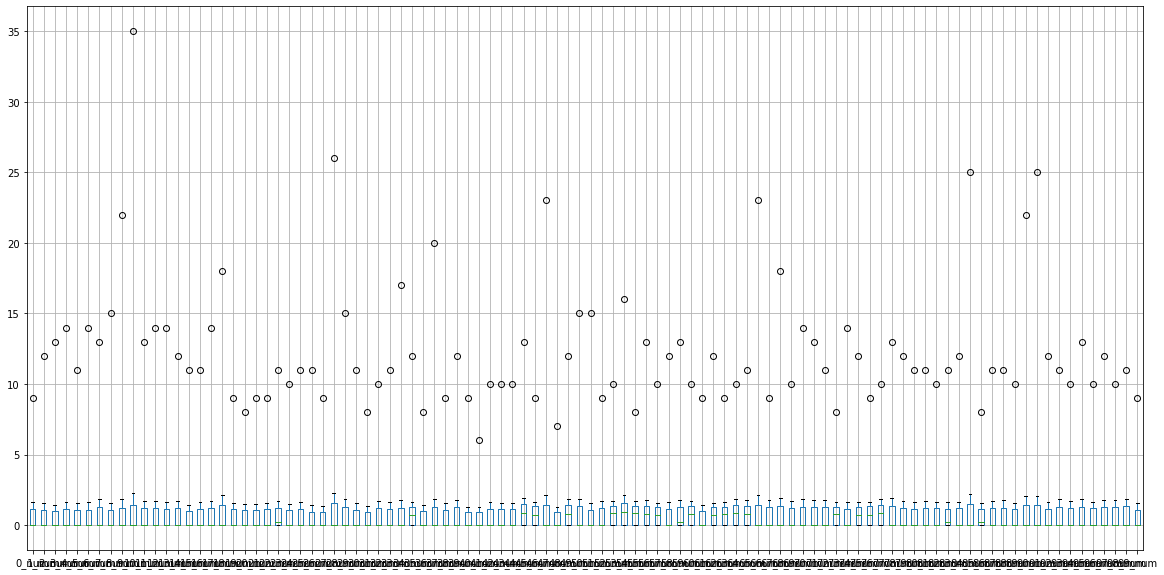

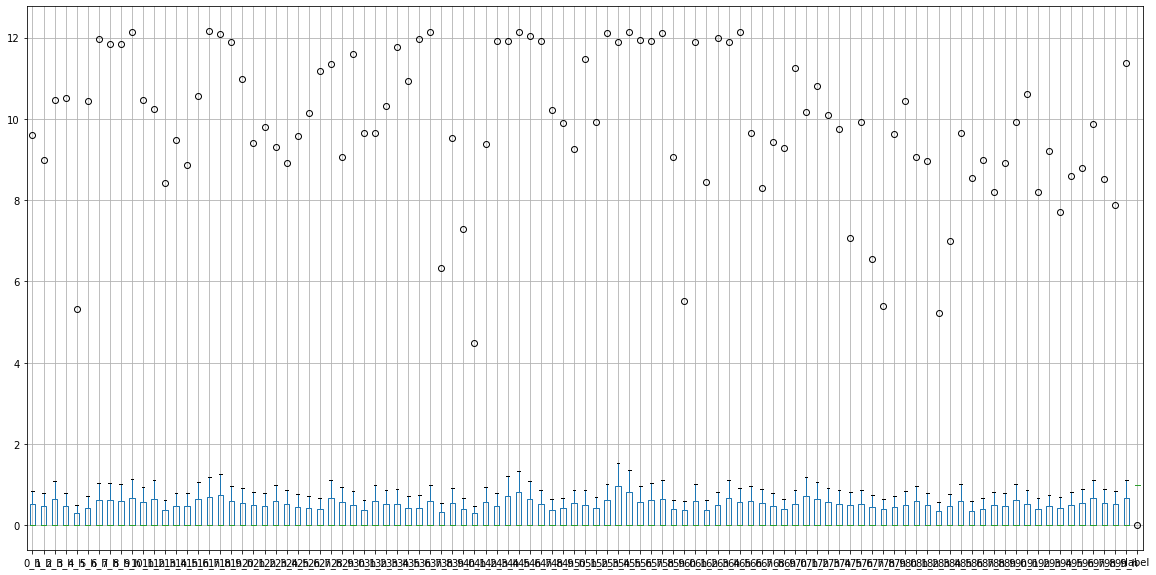

In [54]:
print(df.describe()[1:3])   # 'mean','std','max'

plt.figure(figsize=(20,10))
_ = df.iloc[:,:100].describe(include='all')[1:].boxplot()
plt.figure(figsize=(20,10))
_ = df.iloc[:,100:].describe(include='all')[1:].boxplot()


## Lecture de TOUS les fichiers
5s pour 100 fichiers

40mn ???    pour 40000 fichiers

## Preparation

In [55]:
print(df.shape)


(352, 201)


### Normalisation des données   max= 10 - 35 ???

In [56]:
maxi = 10.  #  ?? densité ou hauteur ??
X_train /= maxi
X_test /= maxi

NameError: name 'X_train' is not defined

# KERAS - TENSORFLOW

In [57]:
tf.keras.datasets

<module 'tensorflow_core.keras.datasets' from '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/datasets/__init__.py'>

In [66]:
df.iloc[:,:-1]

,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,...,90_h,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h
1,0,0,0,0,0,1,0,0,0,0,...,0.00,0.00,0.00,1.74,0.00,0.00,0.0,0.00,0.00,0.00
2,0,0,0,2,2,1,6,4,5,4,...,0.00,0.00,0.00,0.00,0.00,0.10,0.0,0.41,0.26,0.66
3,2,4,4,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
4,0,0,0,0,0,0,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.22,0.0,0.69,0.00,0.09
5,0,0,0,0,0,0,0,0,0,0,...,0.00,3.17,4.63,0.00,0.00,0.00,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,1,2,1,1,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
349,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
350,5,4,3,8,0,0,0,0,0,3,...,0.05,0.71,0.00,0.05,0.27,0.00,0.0,0.00,0.07,0.03
351,0,0,1,0,0,0,1,0,5,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00


In [78]:
from sklearn.model_selection import train_test_split 

# Charge et split les données
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
train_data, test_data, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42) #, uniform)


#.datasets(donnees)

In [79]:
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(281, 200) (281,) (71, 200) (71,)


In [82]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout     #LSTM

N = 200
M = 64
# ou model = Sequential() + model.add(Dense(N)) + model.add(Dropout(0.5)) + model.add(Activation('softmax'))
model = Sequential([
    Dense(64, activation='relu', input_shape=(N,)), #dropout=0.2),
    Dense(64, activation='relu'), #dropout=0.2),
    Dense(1, activation='softmax')
])
#    https://keras.io/losses 
#  loss fonctions: categorical_crossentropy, sparse_categorical_crossentropy, mean_squared_error ... etc
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=5, batch_size=M)



Epoch 1/5
281/281 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/5
281/281 [==============================] - 0s 114us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
281/281 [==============================] - 0s 115us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
281/281 [==============================] - 0s 110us/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
281/281 [==============================] - 0s 93us/step - loss: 0.0000e+00 - accuracy: 1.0000
